# Capstone Project 2: Analisis Popularitas Listing Airbnb di Bangkok

# Latar Belakang & Rumusan Masalah

## Latar Belakang
Airbnb Bangkok memiliki ribuan listing yang dikelola oleh berbagai tipe host, mulai dari individu hingga manajemen properti profesional. Namun, tidak semua listing aktif atau populer di pasar. Perusahaan ingin memahami bagaimana host dapat mengoptimalkan performa listing mereka, khususnya untuk listing yang cenderung "pasif" (jarang update/review).

## Problem Statement
Perusahaan ingin mengidentifikasi faktor-faktor yang mempengaruhi performa listing Airbnb (popularity & revenue potential) agar dapat memberikan strategi optimalisasi kepada host, baik untuk listing aktif maupun pasif.

### Pertanyaan Analitis:
1. Bagaimana sebaran listing berdasarkan room_type dan neighborhood?
2. Bagaimana hubungan antara harga dan tingkat okupansi (availability_365)?
3. Apa karakteristik listing dengan ulasan terbanyak (number_of_reviews_ltm)?
4. Apakah host profesional (is_professional_host) memiliki listing dengan performa lebih baik?
5. Bagaimana pengaruh keterkinian review (review_recency) terhadap performa listing?

# Data Preparation (Cleaning & Feature Engineering)

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
# Load dataset Airbnb Listings Bangkok
url = 'https://raw.githubusercontent.com/Quinntes/airbnb_listings_bangkok/refs/heads/main/Airbnb%20Listings%20Bangkok.csv'
df_raw = pd.read_csv(url)

# Tampilkan 5 baris pertama
df_raw.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


#### Backup Raw Dataset

In [3]:
# Backup Raw Dataset
df_copy = df_raw.copy()

Sebelum melakukan proses data cleaning, penting untuk membuat salinan (*backup*) dari dataset asli.
Hal ini bertujuan untuk:
- Mencegah kehilangan data original jika terjadi kesalahan saat proses cleaning.
- Memungkinkan kita membandingkan dataset yang sudah dibersihkan dengan data mentah aslinya.
- Memberi fleksibilitas untuk rollback ke data awal tanpa perlu me-load ulang file CSV.

Langkah ini hanya akan membuat duplikat DataFrame di memori Python (tidak membuat file baru).

## Data Overview
Sebelum masuk ke analisis, penting memastikan data dalam kondisi bersih dan siap pakai. Proses ini meliputi melihat bentuk data, pengecekan missing values, duplikasi, koreksi tipe data, dan membangun fitur tambahan agar informasi yang tersembunyi bisa ditarik keluar (feature engineering).

In [4]:
# Cek dimensi data
print(f"Jumlah baris: {df_copy.shape[0]}, Jumlah kolom: {df_copy.shape[1]}")

# Tipe data & missing values summary
df_copy.info()

# Statistik deskriptif semua tipe data
df_copy.describe(include='all')

Jumlah baris: 15854, Jumlah kolom: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,15846,1.585400e+04,15853,15854,15854.000000,15854.000000,15854,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
unique,NaN,NaN,14794,NaN,5312,50,NaN,NaN,4,NaN,NaN,NaN,1669,NaN,NaN,NaN,NaN
top,NaN,NaN,New! La Chada Night Market studio 2PPL near MRT,NaN,Curry,Vadhana,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-12-11,NaN,NaN,NaN,NaN
freq,NaN,NaN,45,NaN,228,2153,NaN,NaN,8912,NaN,NaN,NaN,189,NaN,NaN,NaN,NaN
mean,7926.500000,1.579397e+17,NaN,1.541058e+08,NaN,NaN,13.745144,100.559903,NaN,3.217704e+03,15.292355,16.654157,NaN,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,NaN,1.318726e+08,NaN,NaN,0.043040,0.050911,NaN,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,NaN,5.892000e+04,NaN,NaN,13.527300,100.329550,NaN,0.000000e+00,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,NaN,3.974431e+07,NaN,NaN,13.720090,100.529690,NaN,9.000000e+02,1.000000,0.000000,NaN,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,NaN,1.224556e+08,NaN,NaN,13.738490,100.561415,NaN,1.429000e+03,1.000000,2.000000,NaN,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,NaN,2.390547e+08,NaN,NaN,13.759497,100.585150,NaN,2.429000e+03,7.000000,13.000000,NaN,1.060000,13.000000,360.000000,3.000000


### Keterangan Kolom Dataset
| Nama Kolom                         | Deskripsi                                                                 |
|------------------------------------|---------------------------------------------------------------------------|
| Unnamed: 0                         | Index otomatis dari file CSV (bisa diabaikan/dihapus).                    |
| id                                 | ID unik untuk setiap listing.                                             |
| name                               | Nama listing Airbnb.                                                      |
| host_id                            | ID unik pemilik (host).                                                   |
| host_name                          | Nama pemilik listing.                                                     |
| neighbourhood                      | Lokasi/area geografis listing.                                            |
| latitude                           | Koordinat latitude listing.                                               |
| longitude                          | Koordinat longitude listing.                                              |
| room_type                          | Jenis ruang (Entire home/apt, Private room, Shared room, Hotel).          |
| price                              | Harga per malam.                                                          |
| minimum_nights                     | Jumlah malam minimum untuk menginap.                                       |
| number_of_reviews                  | Total jumlah ulasan yang dimiliki listing.                                |
| last_review                        | Tanggal ulasan terakhir.                                                  |
| reviews_per_month                  | Rata-rata ulasan per bulan.                                               |
| calculated_host_listings_count     | Jumlah listing yang dimiliki host di area tersebut.                       |
| availability_365                   | Jumlah hari listing tersedia dalam setahun (maks 365).                    |
| number_of_reviews_ltm              | Jumlah ulasan dalam 12 bulan terakhir.

In [5]:
df_copy['room_type'].value_counts()

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

In [6]:
df_copy['neighbourhood'].value_counts().head(10)

neighbourhood
Vadhana         2153
Khlong Toei     2097
Huai Khwang     1125
Ratchathewi     1114
Bang Rak         827
Sathon           809
Phra Nakhon      619
Phra Khanong     558
Chatu Chak       548
Bang Na          458
Name: count, dtype: int64

### Checklist Decision Data Overview

In [7]:
df_copy.drop(columns=['Unnamed: 0'], inplace=True)

#### Drop Kolom `Unnamed: 0`
Kolom ini merupakan index otomatis dari file CSV saat proses export, sehingga tidak memiliki nilai informasi yang relevan dengan analisis bisnis. Maka dari itu, kolom ini dihapus untuk menjaga kebersihan dataset.

## Missing Values Check
Cek kolom mana yang memiliki missing values.

In [8]:
# Jumlah missing values per kolom
df_copy.isnull().sum()

# Persentase missing values per kolom
(df_copy.isnull().sum() / df_copy.shape[0]) * 100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

### Checklist Decision Missing Values

#### Handling Missing Values: `name` & `host_name`

In [9]:
df_copy['name'].fillna('No Name', inplace=True)

In [10]:
df_copy['host_name'].fillna('Unknown', inplace=True)

- Kolom `name` dan `host_name` memiliki missing values masing-masing sebesar 0.05% dan 0.006% dari total data.
- Kolom ini **tidak digunakan dalam analisis numerik atau segmentasi**, karena:
  - `name`: Hanya sebagai label deskriptif listing.
  - `host_name`: Tidak relevan karena menganalisis host berdasarkan **jumlah listing yang dimiliki (host_type)**, bukan nama perorangan.
- Namun, untuk menjaga konsistensi data (terutama saat menampilkan dataframe di visualisasi), missing values ini diisi dengan placeholder:
  - `name` → 'No Name'
  - `host_name` → 'Unknown'
- Hal ini mencegah visualisasi atau eksplorasi data terganggu oleh nilai NaN yang sebenarnya **tidak mempengaruhi insight bisnis yang ingin disampaikan kepada investor**.

#### Handling Missing Values: `last_review` & `reviews_per_month`

In [11]:
df_copy['has_review'] = df_copy['last_review'].notnull().astype(int)
df_copy['days_since_last_review'] = (pd.Timestamp('today') - pd.to_datetime(df_copy['last_review'], errors='coerce')).dt.days

- Kolom `last_review` dan `reviews_per_month` memiliki missing values sebesar 36.5%.
- Setelah dianalisis, missing values ini muncul karena:
  - Listing tersebut **belum pernah mendapatkan review** (baru dibuat atau pasif).
- Imputasi nilai seperti median atau modus **tidak relevan** karena kehilangan esensi informasinya.
- Sebagai solusi:
  - Dibuat fitur baru `has_review` (binary flag 1/0) untuk mengidentifikasi apakah sebuah listing sudah memiliki review.
  - Kolom `days_since_last_review` dihitung sebagai ukuran keterkinian aktivitas pelanggan.
- Pendekatan ini akan membantu **Airbnb & Host mengidentifikasi listing pasif** yang butuh optimalisasi.
  - Host bisa fokus pada listing yang belum pernah mendapatkan review.
  - Listing dengan review yang sudah lama bisa menjadi prioritas untuk program aktivasi (diskon, promosi, dll).

## Duplicate Check
Cek apakah ada baris duplikat di dataset.

### Checklist Decision Duplicate

#### Duplicate Row Check

In [12]:
# Cek duplicate rows
df_copy.duplicated().sum()

np.int64(0)

- Hasil pemeriksaan menunjukkan **tidak ada baris duplikat identik** di dataset.
- Ini menunjukkan bahwa data sudah unik secara listing ID.
- Namun, pengecekan duplikat tetap wajib dilakukan sebagai langkah validasi awal untuk memastikan **tidak ada data error yang akan memengaruhi akurasi analisis dan rekomendasi kepada investor.**

## Data Type Correction
Pastikan kolom numerik dan tanggal bertipe data yang benar.

### Checklist Decision Data Type

#### Data Type Correction: Kolom `price`& `last_review`

In [13]:
# Kolom price: hapus simbol $ (jika ada) dan ubah ke numerik
df_copy['price'] = df_copy['price'].astype(float)

# Konversi kolom tanggal
df_copy['last_review'] = pd.to_datetime(df_copy['last_review'], errors='coerce')

- Kolom `price` sudah bertipe numerik (int64) dari awal.
- Untuk menjaga konsistensi precision saat perhitungan estimasi revenue (yang mungkin melibatkan pembagian), kolom ini diubah menjadi tipe data float.
- Hal ini memastikan seluruh perhitungan harga (mean, median, korelasi) dapat diproses secara akurat tanpa error parsing di tahap analisis selanjutnya.
- Kolom `last_review` diubah dari object ke datetime agar bisa digunakan dalam perhitungan durasi dan analisis tren waktu.

#### Whitespace Trimming

In [14]:
df_copy['room_type'] = df_copy['room_type'].str.strip()
df_copy['neighbourhood'] = df_copy['neighbourhood'].str.strip()
df_copy['host_name'] = df_copy['host_name'].str.strip()

Trim whitespace pada kolom kategorikal agar tidak terjadi error grouping saat aggregasi atau visualisasi.
Meski data terlihat bersih, langkah ini tetap dijalankan sebagai langkah pencegahan.

## Outlier Detection
Deteksi outlier pada kolom numerik.

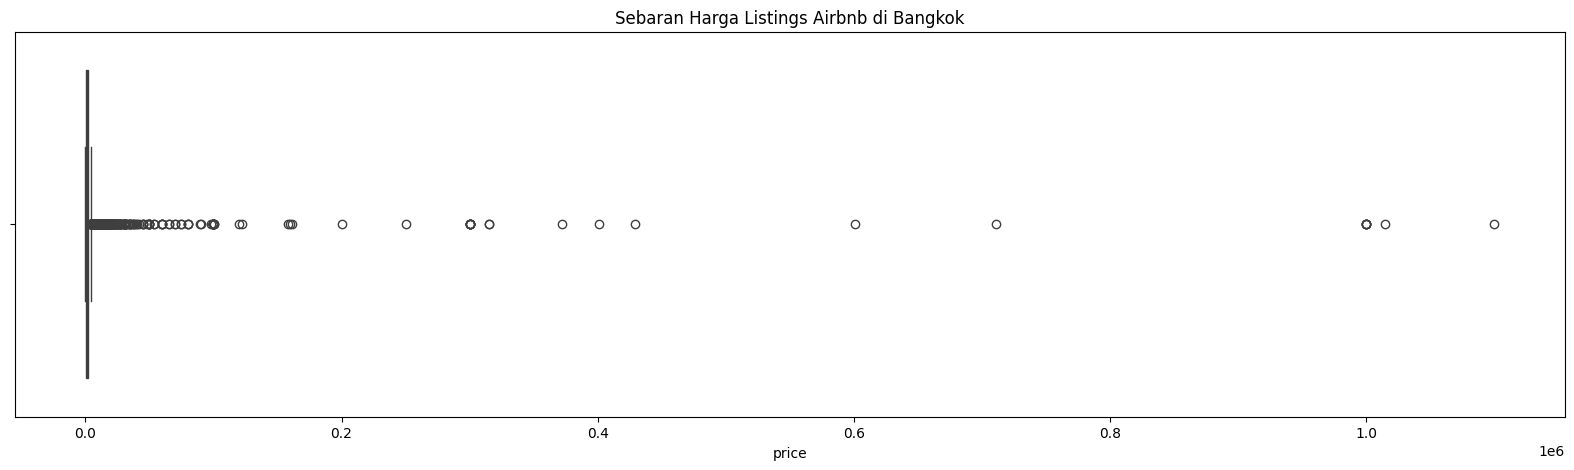

count    1.585400e+04
mean     3.217704e+03
std      2.497212e+04
min      0.000000e+00
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
Name: price, dtype: float64

In [15]:
# Boxplot kolom price u/ mendeteksi sebarannya
plt.figure(figsize=(20,5))
sns.boxplot(x=df_copy['price'])
plt.title('Sebaran Harga Listings Airbnb di Bangkok')
plt.show()

# Cek statistik price
df_copy['price'].describe()

**Insight Result :**
- Data right skewed
- Mayoritas listing terkonsentrasi di rentang harga yang sangat rendah, terlihat dari boxplot yang padat di sisi kiri grafik.
- Terdapat listing dengan harga yang jauh lebih tinggi daripada kebanyakan listing lain, membentuk outlier yang terletak jauh di sisi kanan grafik.
- Variasi harga yang luas ini mengindikasikan adanya segmentasi pasar.

In [16]:
# Cek sebaran harga
print(f"Jumlah listing dengan harga 0: {df_copy[df_copy['price'] == 0].shape[0]}")
print(f"Jumlah listing dengan harga < 500: {df_copy[df_copy['price'] < 500].shape[0]}")

Jumlah listing dengan harga 0: 1
Jumlah listing dengan harga < 500: 753


### Checklist Decision Outlier

#### Outlier Handling: Price = 0 & Luxury Listings

In [17]:
df_copy = df_copy[df_copy['price'] > 0]

- Listing dengan `price = 0` dihapus dari dataset karena:
  - Biasanya merupakan kesalahan input data (tidak relevan untuk analisis performa listing).
  - Tidak masuk akal dari sisi bisnis platform Airbnb karena listing gratis tidak dapat dimonetisasi.
  - Mengganggu perhitungan estimasi revenue & analisis segmentasi harga.
- Luxury Listings (dengan price sangat tinggi) **tidak dihapus** karena:
  - Listing dengan harga premium adalah segmen pasar yang sah (luxury travel market).
  - Membantu host memahami diferensiasi performa di segmen high-end market.
  - Akan dianalisis secara khusus dalam segmentasi granular (price_category).

#### Kolom `minimum_nights` - Extreme High Value (1125 malam)

In [18]:
# Cek distribusi nilai unik minimum_nights yang ekstrem (di atas 365 malam)
extreme_min_nights = df_copy[df_copy['minimum_nights'] > 365]
print(f"Jumlah listing dengan minimum_nights > 365: {extreme_min_nights.shape[0]}")
print("Distribusi nilai ekstrem minimum_nights:")
print(extreme_min_nights['minimum_nights'].value_counts())

Jumlah listing dengan minimum_nights > 365: 15
Distribusi nilai ekstrem minimum_nights:
minimum_nights
500     3
999     2
1125    1
370     1
998     1
399     1
1115    1
700     1
450     1
1000    1
400     1
1095    1
Name: count, dtype: int64


In [19]:
df_copy = df_copy[df_copy['minimum_nights'] <= 365]

Berdasarkan eksplorasi data, ditemukan **15 listing dengan nilai `minimum_nights` lebih dari 365 hari** (maksimum hingga 1125 malam atau ≈ 3 tahun). Nilai ini dianggap tidak wajar dalam konteks operasional Airbnb Bangkok dan berpotensi berasal dari:
1. Listing untuk penyewaan jangka panjang (long-term lease) yang terdaftar di Airbnb.
2. Kesalahan input dari host (data entry error).

#### Alasan Menghapus Data Ini:
1. **Menghindari distorsi statistik & visualisasi**
   - Nilai ekstrem ini akan membuat distribusi minimum_nights menjadi bias.
   - Jika dibiarkan, bisa menyesatkan saat menghitung statistik (mean, median) atau membuat visualisasi sebaran minimum stay.

2. **Volume minoritas yang tidak signifikan**
   - Data ini hanya mencakup 0.09% dari total listing (15 dari 15854 baris), sehingga penghapusan data ini tidak memengaruhi representasi data utama secara signifikan.

3. **Fokus Analisis Optimalisasi Host & Listing Aktif**
   - Proyek ini berfokus pada strategi optimalisasi performa listing (termasuk menghidupkan listing pasif).
   - Listing dengan minimum stay yang sangat tinggi cenderung tidak sejalan dengan tujuan tersebut karena lebih bersifat spesifik untuk kontrak jangka panjang atau outlier input data.

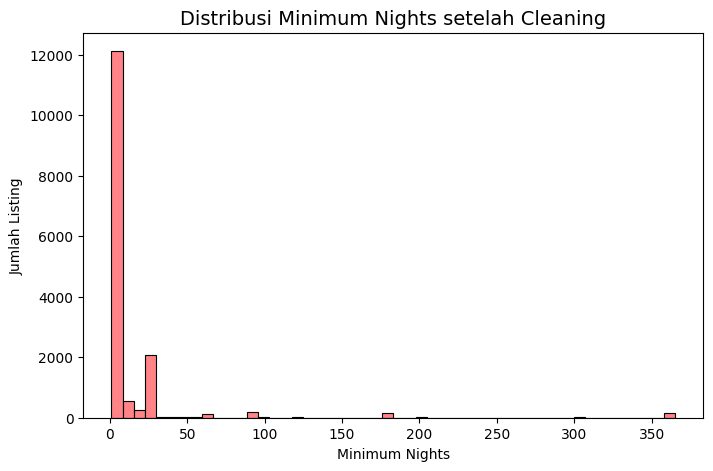

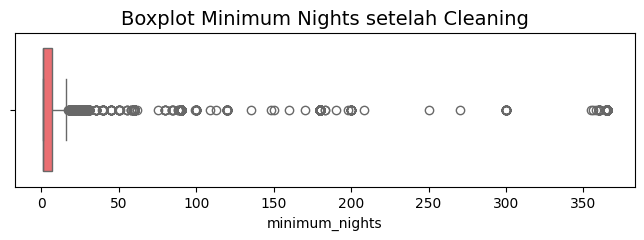

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df_copy['minimum_nights'], bins=50, color='#FF5A5F')  # warna hex Rausch
plt.title('Distribusi Minimum Nights setelah Cleaning', fontsize=14)
plt.xlabel('Minimum Nights')
plt.ylabel('Jumlah Listing')
plt.show()

# Atau boxplot untuk cek outlier
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_copy['minimum_nights'], color='#FF5A5F')
plt.title('Boxplot Minimum Nights setelah Cleaning', fontsize=14)
plt.show()

## Feature Engineering
Dari hasil cleaning, ditemukan beberapa pola yang memerlukan fitur tambahan agar lebih mudah dianalisis. Feature Engineering berikut ini dirancang untuk mempermudah analisis performa listing dari berbagai sudut pandang:

In [21]:
# Status memiliki review atau tidak
df_copy['has_review'] = np.where(df_copy['last_review'].isnull(), 0, 1)

Membedakan listing yang pernah mendapatkan review dengan yang belum pernah direview. Listing tanpa review bisa jadi tidak aktif, baru dibuat, atau kurang diminati. Fitur ini akan sangat berguna saat menganalisis popularitas listing dan perilaku pelanggan.

In [22]:
# Jarak dari hari terkahir mendapatkan review
df_copy['days_since_last_review'] = (pd.Timestamp('today') - df_copy['last_review']).dt.days

Mengukur seberapa *up to date* aktivitas listing di pasar. Listing dengan review yang baru  menunjukkan performa yang relevan dan diminati. Sebaliknya, listing yang lama tidak mendapat review bisa menjadi indikasi penurunan popularitas atau listing yang pasif.

In [23]:
# Klasifikasi tipe host
def categorize_host(listing_count):
    if listing_count == 1:
        return 'Single Host'
    elif 2 <= listing_count <= 5:
        return 'Small Operator'
    else:
        return 'Professional Host'

df_copy['host_type'] = df_copy['calculated_host_listings_count'].apply(categorize_host)

Memahami profil host membantu analisis segmentasi pasar. Host profesional cenderung memiliki strategi pricing dan manajemen properti yang berbeda dibandingkan host individu.

In [24]:
# Estimasi pendapatan kasar
df_copy['estimated_revenue'] = df_copy['price'] * (365 - df_copy['availability_365'])

Fitur ini memberikan estimasi kasar potensi pendapatan listing berdasarkan harga per malam dan ketersediaan listing (availability_365). Walaupun tidak 100% akurat, proyeksi revenue ini membantu host untuk memahami seberapa optimal performa listing mereka dibanding listing lain di pasar.

In [25]:
# Membuat kolom is_professional_host (binary 0/1) u/ memudahkan agregasi
df_copy['is_professional_host'] = np.where(df_copy['calculated_host_listings_count'] > 1, 1, 0)
# Cek distribusi kategorinya
df_copy['is_professional_host'].value_counts()

is_professional_host
1    11239
0     4599
Name: count, dtype: int64

Membuat kategori binary memudahkan analisis segmentasi saat filtering, visualisasi, atau uji statistik. Ini akan menjawab apakah host profesional benar-benar lebih sukses dibandingkan host individu (dari sisi popularitas atau pendapatan).

In [26]:
# Estimasi okupansi
df_copy['estimated_occupancy_rate'] = (365 - df_copy['availability_365']) / 365

Semakin rendah availability, kemungkinan besar listing tersebut sering dipesan (demand tinggi). Fitur ini menjadi indikator minat pasar terhadap listing.

In [27]:
# Menghitung kuartil distribusi harga
q1_price = df_copy['price'].quantile(0.25)
q3_price = df_copy['price'].quantile(0.75)

print(f"Batas Harga Terjangkau (Q1): {q1_price}")
print(f"Batas Harga Premium (Q3): {q3_price}")

# Fungsi klasifikasi harga
def classify_price(price):
    if price < q1_price:
        return 'Terjangkau'
    elif q1_price <= price <= q3_price:
        return 'Menengah'
    else:
        return 'Premium'

# Membuat kolom price_category
df_copy['price_category'] = df_copy['price'].apply(classify_price)

# Cek distribusi kategori harga
df_copy['price_category'].value_counts()

Batas Harga Terjangkau (Q1): 900.0
Batas Harga Premium (Q3): 2429.0


price_category
Menengah      8032
Premium       3956
Terjangkau    3850
Name: count, dtype: int64

Membantu segmentasi pasar (mass market, premium, luxury) sehingga mempermudah analisis pricing strategy di EDA.

In [28]:
# Binning days_since_last_review (untuk yang ada datanya)
bins = [-1, 30, 90, float('inf')]
labels = ['Review Baru (0-30 hari)', 'Cukup Aktif (31-90 hari)', 'Lama Tidak Aktif (>90 hari)']

df_copy['review_recency'] = pd.cut(df_copy['days_since_last_review'], bins=bins, labels=labels, right=True)

# Isi NaN (listing tanpa review) dengan kategori khusus
df_copy['review_recency'] = df_copy['review_recency'].cat.add_categories('Belum Ada Review').fillna('Belum Ada Review')

# Cek distribusi kategori keterkinian review
df_copy['review_recency'].value_counts()

review_recency
Lama Tidak Aktif (>90 hari)    10057
Belum Ada Review                5781
Cukup Aktif (31-90 hari)           0
Review Baru (0-30 hari)            0
Name: count, dtype: int64

Menyederhanakan pemantauan keaktifan listing, sehingga mudah mengidentifikasi listing yang masih relevan di pasar.

## Cross-Field Review Consistency Check
Validasi logika relasi antara number_of_reviews dan last_review.

In [29]:
# Review dengan 0 reviews tapi punya last_review (harusnya tidak ada)
df_copy[(df_copy['number_of_reviews'] == 0) & (df_copy['last_review'].notnull())]

# Review lebih dari 0 tapi last_review kosong (harusnya tidak ada)
df_copy[(df_copy['number_of_reviews'] > 0) & (df_copy['last_review'].isnull())]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,number_of_reviews_ltm,has_review,days_since_last_review,host_type,estimated_revenue,is_professional_host,estimated_occupancy_rate,price_category,review_recency


In [30]:
inconsistent_reviews = df_copy[(df_copy['number_of_reviews'] > 0) & (df_copy['last_review'].isnull())]
print(f"Jumlah listing yang inconsisten (reviews > 0 tapi tidak ada last_review): {inconsistent_reviews.shape[0]}")

Jumlah listing yang inconsisten (reviews > 0 tapi tidak ada last_review): 0


## Post-Cleaning Data Validation
 Melakukan pengecekan ulang untuk memastikan hasil cleaning sesuai ekspektasi dan data siap dianalisis.

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15838 entries, 0 to 15853
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15838 non-null  int64         
 1   name                            15838 non-null  object        
 2   host_id                         15838 non-null  int64         
 3   host_name                       15838 non-null  object        
 4   neighbourhood                   15838 non-null  object        
 5   latitude                        15838 non-null  float64       
 6   longitude                       15838 non-null  float64       
 7   room_type                       15838 non-null  object        
 8   price                           15838 non-null  float64       
 9   minimum_nights                  15838 non-null  int64         
 10  number_of_reviews               15838 non-null  int64         
 11  last_re

In [32]:
df_copy['room_type'].unique()
df_copy['neighbourhood'].nunique()
df_copy['host_type'].value_counts()

host_type
Professional Host    6928
Single Host          4599
Small Operator       4311
Name: count, dtype: int64

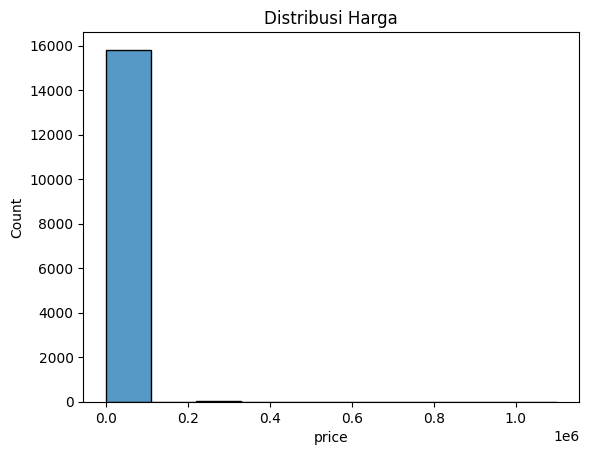

In [33]:
# Distribusi harga setelah cleaning
sns.histplot(df_copy['price'], bins=10)
plt.title('Distribusi Harga')
plt.show()

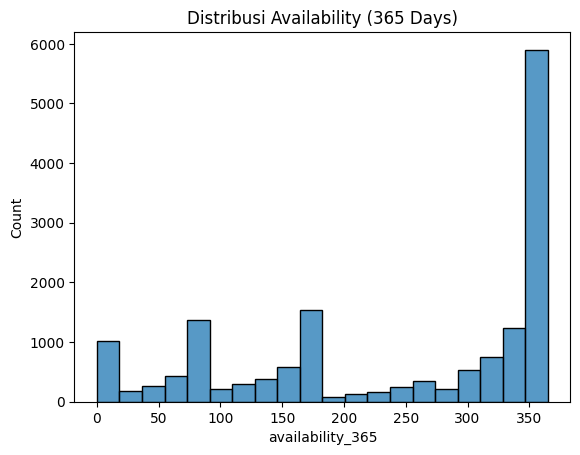

In [34]:
# Distribusi availability_365 setelah cleaning
sns.histplot(df_copy['availability_365'], bins=20)
plt.title('Distribusi Availability (365 Days)')
plt.show()

**Insight Result :**
- Cleaning hanya menghapus minor outlier
- Dominasi listing dengan harga rendah
- Left skewed
- Terdapat puncak yang sangat tinggi di nilai 365 menunjukkan banyak listing yang selalu tersedia sepanjang tahun.
- Ada kelompok kecil listing dengan availability sangat rendah (0-10 hari).
- Terlihat ada spike di availability sekitar 90, 180 hari, dsb.
    - Ini mungkin menunjukkan listing yang diatur per 3 bulan atau 6 bulan siklus ketersediaannya.
    - Bisa jadi ini properti yang dibuka musiman atau pemiliknya hanya menyewakan di periode tertentu.

## Save Cleaned Dataset

Dataset telah melalui proses Data Preparation.

### Final Checklist
- Penanganan missing values secara kontekstual.
- Pembersihan data duplikat dan anomali.
- Koreksi tipe data numerik & tanggal.
- Outlier handling dilakukan untuk menghindari distorsi data yang dapat mempengaruhi akurasi analisis performa listing aktif dan pasif.
- Pembuatan fitur tambahan yang mendukung analisis popularitas listing.

Dataset yang sudah bersih ini akan disimpan dan digunakan untuk proses **Exploratory Data Analysis (EDA)** selanjutnya agar dapat memberikan insight yang akurat dan bernilai bagi kebutuhan investor.

In [35]:
# Save Cleaned Dataset
df_copy.to_csv('cleaned_airbnb_bangkok.csv', index=False)
df = df_copy.copy()

# Exploratory Data Analysis (EDA)

Setelah data bersih dan kaya fitur, maka selanjutnya masuk ke tahap *Exploratory Data Analysis (EDA)*. Di sini, tiap visualisasi dan analisis akan diarahkan untuk menjawab pertanyaan bisnis yang sudah dirumuskan.

## Sebaran listings berdasarkan `room_type` dan `neighborhood`

Dalam proyek ini, fokusnya adalah mengoptimalkan performa listing oleh host.
Sebelum masuk ke faktor performa seperti harga, review, atau okupansi, kita perlu memahami dulu landscape supply alias karakteristik penawaran listing di Airbnb Bangkok.

### Sub Questions:

#### `room_type` apa yang paling dominan di Bangkok?

Room type adalah fitur fundamental dalam struktur sebuah listing. Tipe kamar tidak hanya membentuk ekspektasi tamu, tetapi juga menentukan bagaimana host akan mengelola operasional dan harga.

Dengan memahami room_type apa yang paling mendominasi supply di Bangkok, kita bisa:
- Menyimpulkan preferensi umum dari host (dan mungkin juga tamu).
- Menentukan apakah pasar kompetitif didominasi oleh satu jenis listing tertentu.

nb: Jika satu room_type sangat dominan, maka strategi optimalisasi harus mempertimbangkan dinamika kompetisi dan diferensiasi dalam room_type tersebut.

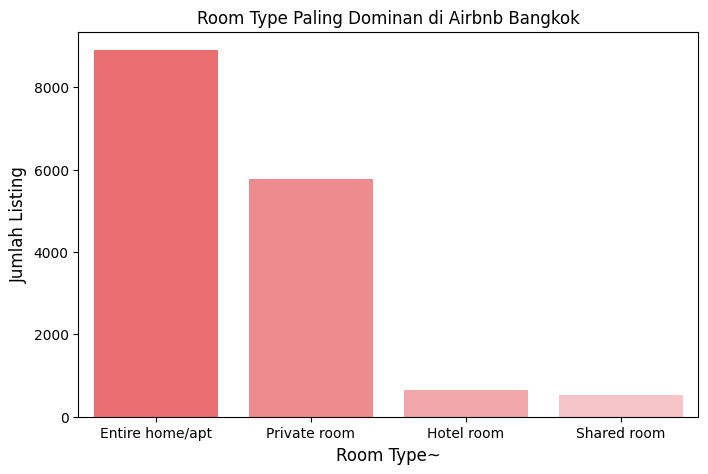

In [36]:
# palet Rausch
rausch = ['#FF5A5F', '#FF7A7E', '#FF9A9F', '#FFBBBF']

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='room_type',
    order=df['room_type'].value_counts().index,
    palette=rausch
)
plt.title('Room Type Paling Dominan di Airbnb Bangkok')
plt.xlabel('Room Type~', fontsize=12)
plt.ylabel('Jumlah Listing', fontsize=12)
plt.show()

**Insight :**
- Entire home/apt terlihat jauh lebih tinggi jumlah listingnya dibandingkan 3 tipe lainnya.
- Berdasarkan praktik umum di pasar Airbnb, sewa satu unit penuh (Entire home/apt) adalah jenis paling populer secara global, karena menawarkan:
    - Privasi penuh
    - Fleksibilitas waktu
    - Cocok untuk keluarga atau grup
- Shared room dan Hotel room cenderung:
    - Dipilih oleh budget travelers.
    - Kurang populer jika dibandingkan dengan privasi yang ditawarkan oleh unit full.

#### `Neigborhood` mana yang memiliki supply listing terbanyak?

Dalam visualisasi ini, hanya ditampilkan **10 neighborhood dengan jumlah listing terbanyak**.

Alasan pembatasan ini:
- Fokus pada area yang paling relevan secara bisnis.
- Meningkatkan keterbacaan dan kejelasan visual.
- Supply listing di area ini cenderung paling kompetitif, sehingga penting untuk host memahami dinamika pasar di wilayah ini.

Area dengan jumlah listing sangat rendah (long tail) tidak dianalisis di sini karena dampaknya minimal terhadap pola kompetisi utama.


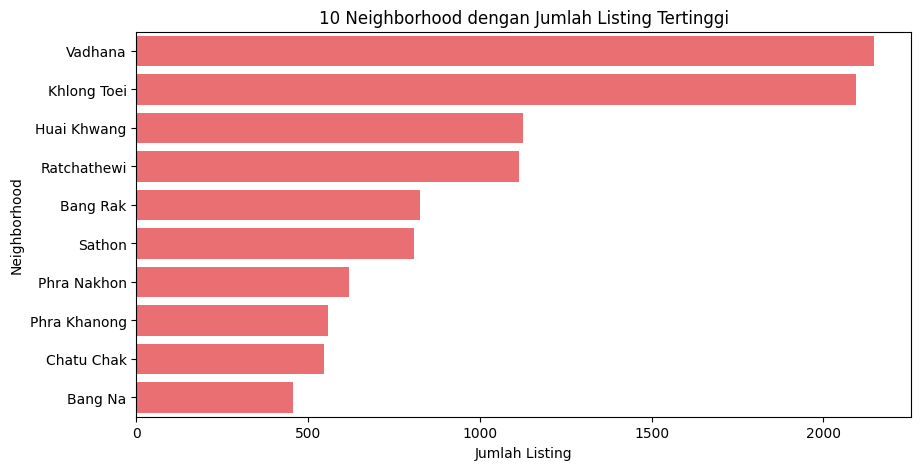

In [37]:
plt.figure(figsize=(10, 5))
top_neigh = df['neighbourhood'].value_counts().head(10)
sns.barplot(x=top_neigh.values, y=top_neigh.index, color='#FF5A5F')
plt.title('10 Neighborhood dengan Jumlah Listing Tertinggi')
plt.xlabel('Jumlah Listing')
plt.ylabel('Neighborhood')
plt.show()

**Insight :**
- Vadhana dan Khlong Toei menempati posisi teratas, masing-masing dengan lebih dari 2.000 listing.
- Tingginya jumlah listing di beberapa neighborhood dapat mengindikasikan:
    - Konsentrasi supply yang lebih tinggi.
    - Potensi kompetisi antar host yang lebih ketat di area tersebut.

#### Apakah tipe listing (room_type) tertentu lebih umum di area-area tertentu?

Setelah mengetahui neighborhood dengan jumlah listing tertinggi, langkah berikutnya adalah mengeksplorasi kombinasi antara room_type dan neighborhood.

Hal ini penting karena:
- Setiap neighborhood bisa punya karakteristik demand yang berbeda.
- Tipe room yang dominan di suatu area bisa menjadi indikator preferensi pasar lokal.
- Informasi ini membantu host menyesuaikan penawaran produk mereka agar lebih kompetitif di lokasi tertentu.

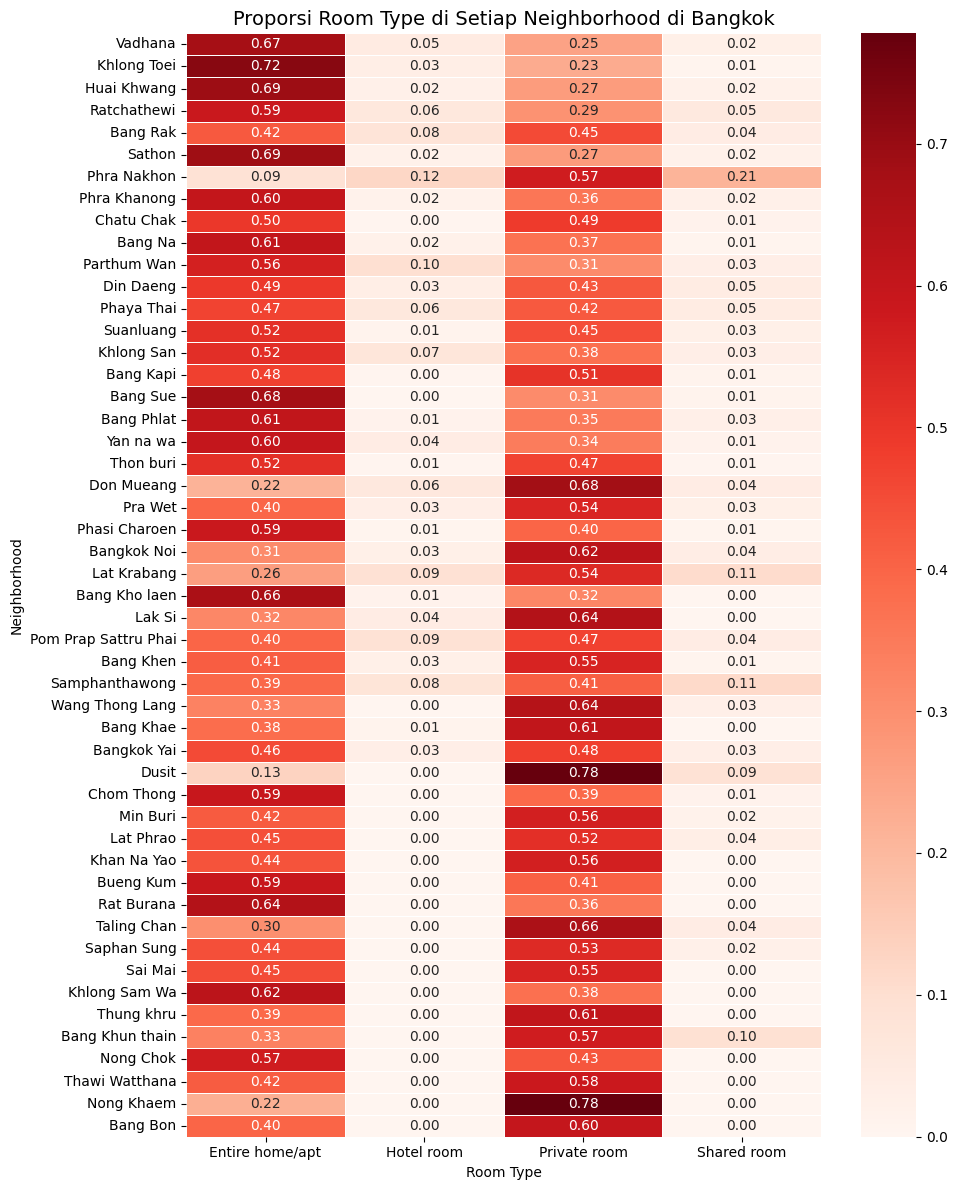

In [38]:
# Buat crosstab untuk melihat proporsi room_type per neighbourhood
crosstab = pd.crosstab(df['neighbourhood'], df['room_type'], normalize='index')

# Sort by total jumlah listing per neighbourhood agar lebih rapi
neighbourhood_order = df['neighbourhood'].value_counts().index

# Plot heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(crosstab.loc[neighbourhood_order], cmap='Reds', annot=True, fmt='.2f', linewidths=.5)

plt.title('Proporsi Room Type di Setiap Neighborhood di Bangkok', fontsize=14)
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

In [39]:
# Ambil 5 neighborhood dengan proporsi tertinggi untuk setiap room_type
top5_neighborhood = {}

for room in crosstab.columns:
    top5_neighborhood[room] = crosstab[room].sort_values(ascending=False).head(3) * 100  # jadi persen

# Tampilkan hasilnya
for room, top5 in top5_neighborhood.items():
    print(f"\nTop 5 Neighborhood untuk {room}:")
    print(top5.round(2))


Top 5 Neighborhood untuk Entire home/apt:
neighbourhood
Khlong Toei    72.47
Huai Khwang    68.98
Sathon         68.81
Name: Entire home/apt, dtype: float64

Top 5 Neighborhood untuk Hotel room:
neighbourhood
Phra Nakhon    12.44
Parthum Wan     9.91
Lat Krabang     9.40
Name: Hotel room, dtype: float64

Top 5 Neighborhood untuk Private room:
neighbourhood
Dusit         77.78
Nong Khaem    77.78
Don Mueang    68.26
Name: Private room, dtype: float64

Top 5 Neighborhood untuk Shared room:
neighbourhood
Phra Nakhon       21.16
Samphanthawong    11.40
Lat Krabang       10.74
Name: Shared room, dtype: float64


**Insight :**
- Entire home/apt yang mendominasi, Khlong Toei (72.47%), Huai Khwang (68.98%), Sathon (68.81%).
    -  Ini berarti mayoritas besar host di wilayah tersebut menawarkan properti full-unit, yang biasanya relevan untuk target pasar keluarga atau group traveler.
- Entire home/apt yang mendominasi, Phra Nakhon (12.44%), Parthum Wan (9.91%), Lat Krabang (9.40%).
    - Nilainya jauh lebih kecil karena supply hotel room di Airbnb Bangkok secara umum memang terbatas. Proporsi < 15% berarti hotel room di Airbnb bukan pilihan dominan di area mana pun.
- Private room yang mendominasi, Nong Khaem (77.78%), Dusit (77.78%), Don Mueang (68.26%).
    - Angka tinggi ini menunjukkan dominasi listing kamar pribadi di rumah/apartemen yang sudah dihuni, biasanya dari host individu.
- Shared room yang mendominasi, Phra Nakhon (21.16%), Samphanthawong (11.40%), Lat Krabang (10.74%).
    - Angka ini relatif kecil karena supply shared room di Bangkok memang sangat rendah di seluruh wilayah, jadi 21% pun sebenarnya berasal dari total listing yang sedikit.


- Host yang ingin bermain di segmen entire home/apt sebaiknya mempertimbangkan Khlong Toei, Huai Khwang, dan Sathon karena pasarnya besar, tapi perlu analisis lanjut soal persaingan dan harga.
- Untuk private room, wilayah seperti Nong Khaem dan Dusit bisa menjadi niche market bagi traveler budget atau long-term stay.
- Hotel room & shared room sebaiknya hanya jadi opsi jika target pasar benar-benar sesuai, karena demand dan supply di Airbnb Bangkok relatif rendah.

#### Bagaimana distribusi minimum_nights di tiap room_type?

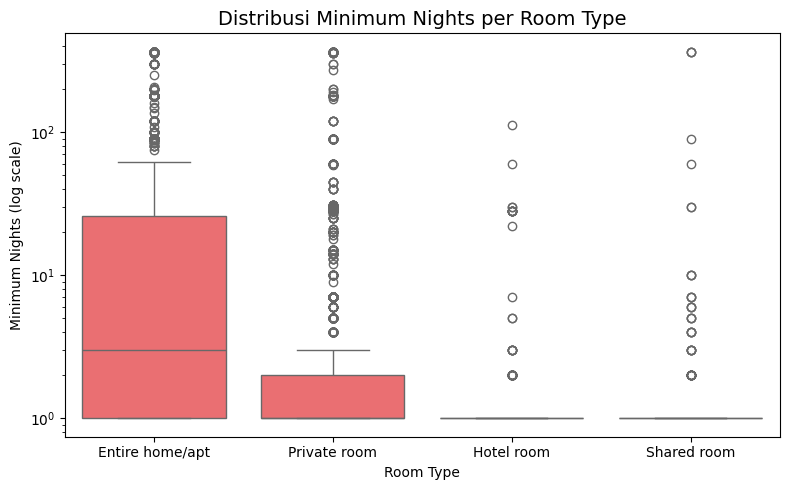

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='room_type',
    y='minimum_nights',
    color='#FF5A5F'  # Airbnb Rausch
)
plt.yscale('log')  # Skala log agar data ekstrem tetap terbaca
plt.title('Distribusi Minimum Nights per Room Type', fontsize=14)
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights (log scale)')
plt.tight_layout()
plt.show()

**Insight :**
- Entire home/apt & Private room punya sebaran lebih lebar
    - Ada banyak outlier ke arah minimum_nights yang tinggi, bahkan ratusan malam.
    - Ini masuk akal kalau ada host yang menetapkan sewa jangka panjang.
- Hotel room & Shared room terlihat seperti flat line
    - Median, Q1, Q3 semuanya di 1 malam, hampir tanpa variasi.
    - Ada sedikit outlier, tapi jumlahnya kecil sekali.
    - Secara bisnis, ini masuk akal kalau hotel & shared room memang cenderung mengizinkan minimal 1 malam, tapi kita perlu pastikan dari data apakah benar hampir semua nilainya 1.
- Potensi masalah data untuk Hotel room & Shared room
    - Kalau nilainya seragam banget di 1 malam, kita perlu cek apakah itu karena memang pola pasar atau karena data entry bias (misalnya scraping hanya menangkap listing dengan nilai default).

In [45]:
# Cek distribusi minimum_nights per room_type
for room in df['room_type'].unique():
    print(f'\nDistribusi minimum_nights untuk {room}:')
    print(df[df['room_type'] == room]['minimum_nights'].value_counts(normalize=True) * 100)



Distribusi minimum_nights untuk Entire home/apt:
minimum_nights
1      35.531341
2      13.053246
30     11.210964
3       8.166704
28      5.380813
         ...    
208     0.011233
17      0.011233
99      0.011233
39      0.011233
364     0.011233
Name: proportion, Length: 69, dtype: float64

Distribusi minimum_nights untuk Private room:
minimum_nights
1      69.644406
2       9.089332
30      5.967042
3       3.972246
7       2.324371
5       1.214224
28      1.023417
4       0.849957
180     0.849957
15      0.693842
365     0.624458
14      0.624458
90      0.607112
60      0.416305
10      0.416305
20      0.260191
6       0.242845
29      0.156114
31      0.138768
25      0.121422
360     0.086730
45      0.086730
120     0.086730
40      0.086730
13      0.069384
21      0.052038
200     0.034692
27      0.034692
300     0.034692
19      0.034692
59      0.017346
170     0.017346
18      0.017346
9       0.017346
89      0.017346
12      0.017346
183     0.017346
270     0.01

#### Bagaimana persebaran host_type disetiap neighborhood?

- Kolom Data: room_type, neighborhood, minimum_nights, host_type

Setelah mengetahui bahwa beberapa neighborhood memiliki konsentrasi listing yang tinggi, selanjutnya kita ingin mengetahui apakah harga dan okupansi listing di area tersebut juga mengikuti tren tertentu. Oleh karena itu, analisis akan dilanjutkan ke hubungan antara harga dan okupansi.

- Harga vs okupansi
- Sub-questions:
    - Apakah harga listing memengaruhi availability_365?
    - Adakah 'sweet spot' harga dengan okupansi optimal?
    - Bagaimana distribusi estimated_reveneu di tiap price_category?
    - Apakah room_type memengaruhi hubungan price dan okupansi?
    - Apakah profesional_host lebih sering mengatur harga di segmen premium?
- Kolom Data: price, availability_365, estimated_revenue, price_category, room_type, is_professional_host

- Karakteristik listing populer (number_of_reviews_ltm)
- Sub-questions:
    - Tipe room apa yang paling banyak direview?
    - Neighborhood mana yang listingnya paling populer?
    - Bagaimana hubungan price_category dengan jumlah review?
    - Apakah host_type tertentu lebih sering mendapatkan review tinggi?
    - Seberapa aktif listing populer diukur dari review_recency?
- Kolom Data: number_of_reviews_ltm, room_type, neighbourhood, price_category, host_type, review_recency

- Performa host profesional vs non profesional
- Sub-questions:
    - Apakah professional_host memiliki availability yang lebih tinggi?
    - Apakah estimated_revenue professional_host lebih tinggi dibandingkan single_host?
    - Bagaimana distribusi price_category antara professional_host dan single_host?
    - Apakah professional_host lebih banyak listing di neighborhood premium?
    - Bagaimana performa engagement (reviews) antara professional_host dan lainnya?
- Kolom Data: is_professional_host, availability_365, estimated_revenue, price_category, neighbourhood, number_of reviews_ltm

- Pengaruh recency reviews terhadap performa listing
- Sub-questions:
    - Bagaimana ditribusi listing dalam kategori review_recency?
    - Apakah listing dengan review terbaru memiliki price lebih tinggi?
    - Apakah estimated_occupancy_rate listing aktif lebih tinggi?
    - Seberapa besar gap performa revenue antara listing aktif vs pasif?
    - Apakah host_type berpengaruh terhadap recency_review?
- Kolom Data: review_recency, price, estimated_occupancy_rate, estimated_revenue, host_type